### <b>ATTRIBUTE INFORMATION</b>

<i><b>INPUT VARIABLES:</b><i>
    
<u>Bank Client Data:</u>
    
1. <b>Age</b>: Age of the client contacted in the direct marketing campaign.
2. <b>Job</b>: Type of job held by the client.
3. <b>Marital</b>: Marital status of the client.
4. <b>Education</b>: Educational qualification of the client.
5. <b>Default</b>: Has the client defaulted on his or her credit borrowing?
6. <b>Balance</b>: Average yearly balance in client's bank account, in euros.
7. <b>Housing</b>: Does the client have housing loan?
8. <b>Loan</b>: Does the client have personal loan?

<u>Data about contacts made during the current campaign:</u>
    
9. <b>Contact</b>: Type of communication used to contact the client.
10. <b>Day</b>: The date of the day when the client was contacted.
11. <b>Month</b>: The month when the client was contacted.
12. <b>Duration</b>: The call duration of the contact made to the client (in seconds).
13. <b>Campaign</b>: Number of contacts made with the client during this campaign.
14. <b>Pdays</b>: Number of days that passed by after the client was last contacted from a previous campaign.
15. <b>Previous</b>: Number of contacts performed for the given client before this campaign.
16. <b>Poutcome</b>: Outcome of the previous marketing campaign.

<i><b>TARGET VARIABLE:</b><i>
    
17. <b>Y</b>: Has the client subscribed a term deposit?

### <b>IMPORT LIBRARIES</b>

In [138]:
# Data Wrangling Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import seaborn as sns
from matplotlib import pyplot as plt

# Data Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# RandomOversampler Library to handle imbalanced dataset
from imblearn.over_sampling import RandomOverSampler

# Feature Selection Library
from sklearn.feature_selection import chi2

# Classifier Algorithms Libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Machine Learning Metrics Libraries
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

%matplotlib inline

### <b>READ & EXPLORE DATA</b>

#### 1) Read the data into a Pandas DataFrame

In [2]:
bank_data = pd.read_csv("bank_data.csv", sep=";")

#### 2) Get an initial glance at the dataset

In [3]:
display(bank_data.head())
display(bank_data.tail())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


#### 3) Get the number of rows & columns of dataset

In [4]:
bank_data_shape = bank_data.shape
print(f"The number of rows in dataset is: {bank_data_shape[0]}")
print(f"The number of columns in dataset is: {bank_data_shape[1]}")

The number of rows in dataset is: 45211
The number of columns in dataset is: 17


In [5]:
cols = bank_data.columns

#### 4) Get comprehensive information about the dataset

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### 5) Check for missing values

Text(0.5, 1.0, 'Visualizing Missing Values')

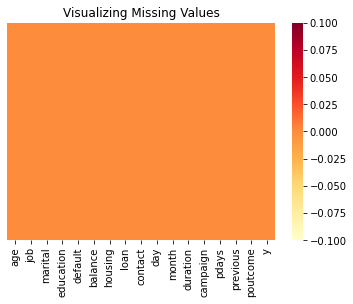

In [7]:
missing_values = bank_data.isnull()
sns.heatmap(missing_values, cmap="YlOrRd", yticklabels=False)
plt.title("Visualizing Missing Values")

#####
<i>There are no missing values in the dataset.</i>

#### 6) Explore Continuous Features

##### 6A) Get a list of continuous features

In [8]:
continuous_features = list(bank_data.select_dtypes(include='int64').columns)
continuous_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

##### 6B) Analyze the distribution of "age" variable by the target variable "y"

Text(0.5, 1.0, 'Analyzing the likelihood to Subscribe by Age')

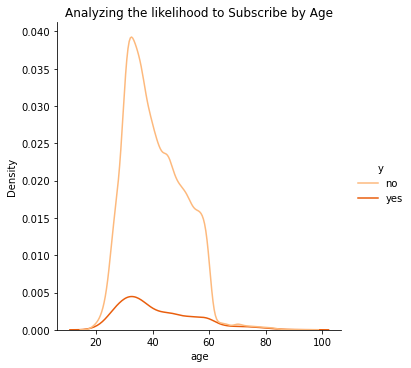

In [9]:
sns.displot(kind="kde",
            data=bank_data, 
            x="age", 
            hue="y", palette="Oranges")
plt.title("Analyzing the likelihood to Subscribe by Age")

##### 
<i>Focusing only on the clients who have subscribed to the term deposit, we observe that the proportion of younger clients (in their 30s) who subscribed to the term deposit is higher compared to clients in other age groups.</i>

<i>However, this is not to say that the bank should focus their marketing efforts only on youger clients. As we can see from the graph, the likelihood of not subscribing is also the highest among younger clients. So, there is a high possibility that contacting a younger client wouldn't be as fruitful; he or she is more likely to not subscribe to the term deposit. And this is true for all clients below the age of 60; they are more likely to not subscribe to the term deposit.</i>

##### 6C) Analyze the distribution of "balance" variable by the target variable "y"

Text(0.5, 1.0, 'Analyzing the likelihood to Subscribe by Account Balance')

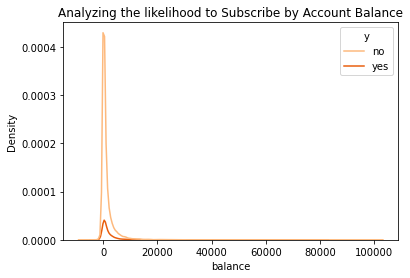

In [10]:
sns.kdeplot(data=bank_data, 
            x="balance",
            hue="y",
            palette="Oranges")

plt.title("Analyzing the likelihood to Subscribe by Account Balance")

###### Analyze the distribution of "balance" variable by the target variable "y"

###### Set A = Balance is greater than €0 but less than €25000

Text(0.5, 1.0, 'Analyzing the likelihood to Subscribe by Account Balance: €0 to €25000')

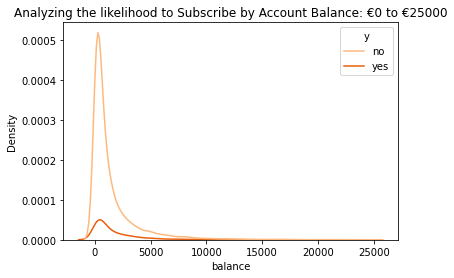

In [11]:
bank_data_A = bank_data[(bank_data["balance"]>0) & (bank_data["balance"]<25000)]

sns.kdeplot(data=bank_data_A, 
            x="balance",
            hue="y",
           palette="Oranges")

plt.title("Analyzing the likelihood to Subscribe by Account Balance: €0 to €25000")

###### Analyze the distribution of "balance" variable by the target variable "y"

###### Set B = Balance is greater than €25000 but less than €45000

Text(0.5, 1.0, 'Analyzing the likelihood to Subscribe by Account Balance: €25000 to €45000')

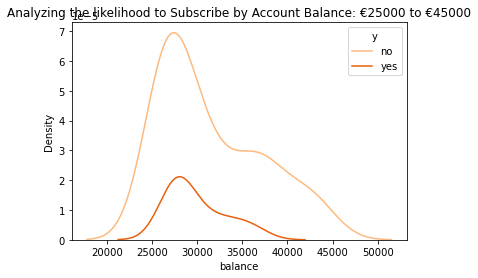

In [12]:
bank_data_B = bank_data[(bank_data["balance"]>25000) & (bank_data["balance"]<45000)]

sns.kdeplot(data=bank_data_B, 
            x="balance",
            hue="y",
           palette="Oranges")

plt.title("Analyzing the likelihood to Subscribe by Account Balance: €25000 to €45000")

###### Analyze the distribution of "balance" variable by the target variable "y"

###### Set C = Balance is greater than €35000 but less than €50000

Text(0.5, 1.0, 'Analyzing the likelihood to Subscribe by Account Balance: €35000 to €50000')

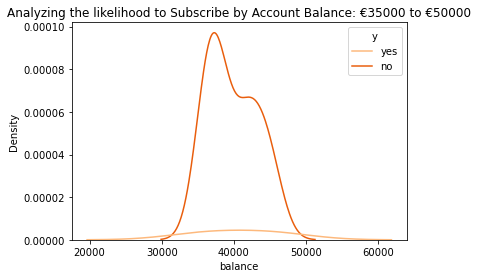

In [13]:
bank_data_C = bank_data[(bank_data["balance"]>35000) & (bank_data["balance"]<50000)]

sns.kdeplot(data=bank_data_C, 
            x="balance",
            hue="y",
           palette="Oranges")

plt.title("Analyzing the likelihood to Subscribe by Account Balance: €35000 to €50000")

###### Analyze the distribution of "balance" variable by the target variable "y"

###### Set D = Balance is greater than €50000 but less than €100000

Text(0.5, 1.0, 'Analyzing the likelihood to Subscribe by Account Balance: €50000 to €100000')

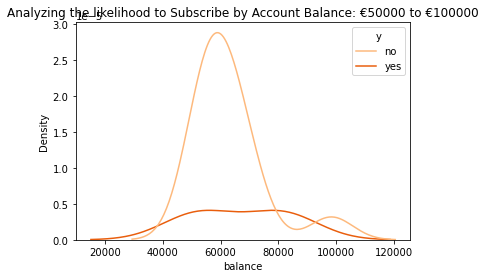

In [14]:
bank_data_D = bank_data[(bank_data["balance"]>50000) & (bank_data["balance"]<100000)]

sns.kdeplot(data=bank_data_D, 
            x="balance",
            hue="y", palette="Oranges")

plt.title("Analyzing the likelihood to Subscribe by Account Balance: €50000 to €100000")

#####
<i>Apart from the range between 80000 and 90000, for all balance ranges, the proportion of those who did not subscribe for the term deposit is greater than those who did. For the balance in the range 80000-90000, we see that the proportion who subcribed is greater than those who did not. This information could be useful from a marketing perspective, but I'm not sure if the bank's marketing department has access to customer's account balance information for privacy reasons.</i>

##### 6D) Create a distribution plot of "duration" variable by the target variable "y"

In [15]:
max_call_duration = (bank_data["duration"].max())/60
min_call_duration = (bank_data["duration"].min())/60
avg_call_duration = (bank_data["duration"].mean())/60

print(f"The maximum call duration made to any client is: {round(max_call_duration)} minutes")
print(f"The minimum call duration made to any client is: {round(min_call_duration)} minutes")
print(f"The average call duration made to any client is: {round(avg_call_duration)} minutes")

The maximum call duration made to any client is: 82 minutes
The minimum call duration made to any client is: 0 minutes
The average call duration made to any client is: 4 minutes


Text(0.5, 1.0, 'Analyzing the likelihood to Subscribe by Call Duration')

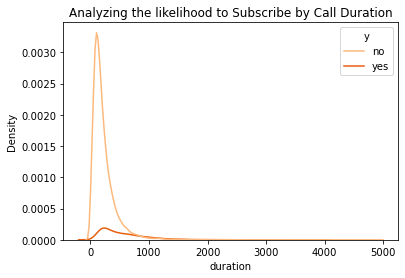

In [16]:
sns.kdeplot(data=bank_data, 
            x="duration",
            hue="y", palette="Oranges")

plt.title("Analyzing the likelihood to Subscribe by Call Duration")

<AxesSubplot:xlabel='duration', ylabel='Density'>

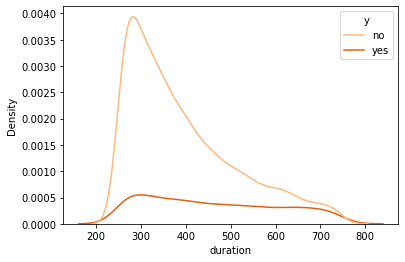

In [17]:
bank_data_duration_A = bank_data[(bank_data["duration"]>250) & (bank_data["duration"]<750)]

sns.kdeplot(data=bank_data_duration_A,
            x="duration",
           hue="y", palette="Oranges")

<AxesSubplot:xlabel='duration', ylabel='Density'>

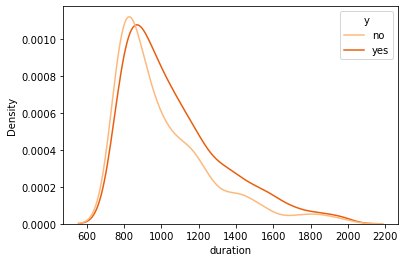

In [18]:
bank_data_duration_B = bank_data[(bank_data["duration"]>750) & (bank_data["duration"]<2000)]

sns.kdeplot(data=bank_data_duration_B,
            x="duration",
           hue="y", palette="Oranges")

<AxesSubplot:xlabel='duration', ylabel='Density'>

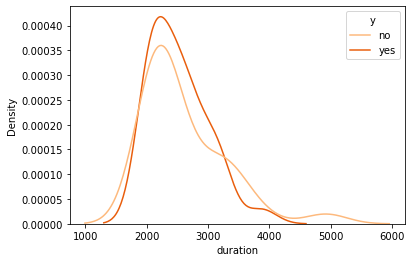

In [19]:
bank_data_duration_C = bank_data[(bank_data["duration"]>2000) & (bank_data["duration"]<5000)]

sns.kdeplot(data=bank_data_duration_C,
            x="duration",
           hue="y", palette="Oranges")

#####
<i>From the previous analyses we glean that lower call duration doesn't translate to subscription, whereas higher call duration, more or less, results in the client subscribing to the term deposit scheme. However, it is important to note that call duration cannot be predicted before hand. So even if this variable seems to have a strong influence on the target variable, we cannot really use it for our predictive analysis.</i>

##### 6D) Create a distribution plot of "campaign" variable by the target variable "y"

In [20]:
max_number_contacts = bank_data["campaign"].max()
min_number_contacts = bank_data["campaign"].min()
avg_number_contacts = bank_data["campaign"].mean()

print(f"The maximum number of contacts made during the campaign to any client is: {max_number_contacts}")
print(f"The minimum number of contacts made during the campaign to any client is: {min_number_contacts}")
print(f"The average number of contacts made during the campaign to any client is: {round(avg_number_contacts)}")

The maximum number of contacts made during the campaign to any client is: 63
The minimum number of contacts made during the campaign to any client is: 1
The average number of contacts made during the campaign to any client is: 3


<AxesSubplot:xlabel='y', ylabel='campaign'>

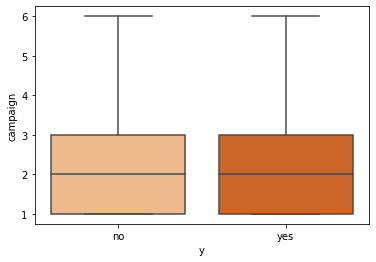

In [21]:
sns.boxplot(data=bank_data,
            y=bank_data["campaign"],
           x="y", showfliers = False, palette="Oranges")

##### 6E) Create a distribution plot of "pdays" variable by the target variable "y"

In [22]:
max_pdays_contact = bank_data["pdays"].max()
min_pdays_contact = bank_data["pdays"].min()
avg_pdays_contact = bank_data["pdays"].mean()

print(f"The maximum number of days passed after the client was last contacted from a previous campaign is: {max_pdays_contact}")
print(f"The minimum number of days passed after the client was last contacted from a previous campaign is: {min_pdays_contact}")
print(f"The average number of days passed after the client was last contacted from a previous campaign is: {round(avg_pdays_contact)}")

The maximum number of days passed after the client was last contacted from a previous campaign is: 871
The minimum number of days passed after the client was last contacted from a previous campaign is: -1
The average number of days passed after the client was last contacted from a previous campaign is: 40


<AxesSubplot:xlabel='y', ylabel='pdays'>

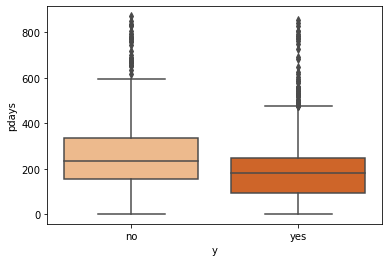

In [23]:
bank_data_pdays = bank_data[bank_data["pdays"] != -1]

sns.boxplot(data=bank_data_pdays,
            y=bank_data["pdays"],
           x="y", showfliers = True, palette="Oranges")

#####
<i>The variable "pdays" shows the number of days that passed by after the client was last contacted from a previous campaign. When I looked at the data, I saw that the minimum number of days that passed by is -1, which doesn't make any sense. So, I filtered all rows that did not have pdays = -1 and created boxplots for the remaining records. From the boxplots, we see that on average, for the customers who subscribed to the term deposit, the number of days passed from previous contact was considerbly less than those who did not subscribe to the scheme. So, the bank marketing department should keep frequent contacts with customers to develop a loyal customer base.</i>

<i>Those clients with whom the bank had recent contacts were more likely to subscribe to the scheme... Subscribed = Yes --> Those with whom the last contact was made very recently</i>

##### 6E) Create a distribution plot of "previous" variable by the target variable "y"

In [24]:
max_previous_contact = bank_data["previous"].max()
min_previous_contact = bank_data["previous"].min()

print(f"The maximum number of contacts performed for the given client before this campaign is: {max_previous_contact}")
print(f"The minimum number of contacts performed for the given client before this campaign is: {min_previous_contact}")

The maximum number of contacts performed for the given client before this campaign is: 275
The minimum number of contacts performed for the given client before this campaign is: 0


<AxesSubplot:xlabel='y', ylabel='previous'>

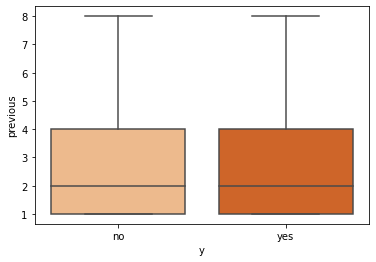

In [25]:
sns.boxplot(data=bank_data_pdays,
            y=bank_data["previous"],
           x="y", showfliers = False, palette="Oranges")

#####
<i>Similar for those who subscribed and those who did not subscribe.</i>


#### 7) Explore Categorical Features

##### 7A) Get a list of categorical features

In [26]:
categorical_features = list(bank_data.select_dtypes(include='object').columns)
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

<AxesSubplot:xlabel='count', ylabel='job'>

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

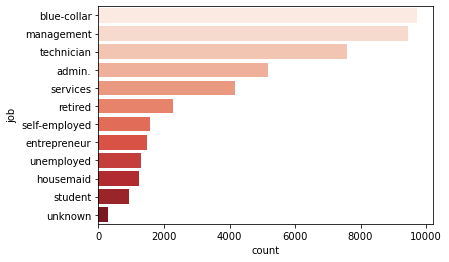

In [27]:
display(sns.countplot(data=bank_data, y="job", order=bank_data['job'].value_counts().index, palette="Reds"))

display(bank_data["job"].value_counts(dropna=False))

<AxesSubplot:xlabel='marital', ylabel='count'>

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

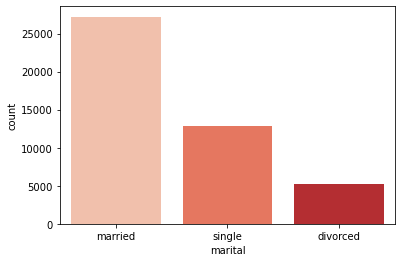

In [28]:
display(sns.countplot(data=bank_data, x="marital", palette="Reds"))

display(bank_data["marital"].value_counts(dropna=False))

<AxesSubplot:xlabel='education', ylabel='count'>

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

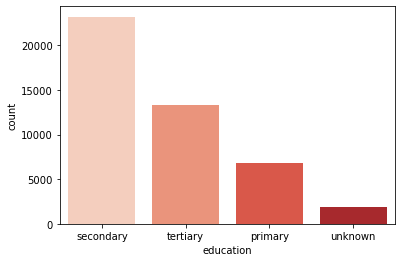

In [29]:
display(sns.countplot(data=bank_data, x="education",  order=bank_data['education'].value_counts().index, palette="Reds"))
display(bank_data["education"].value_counts(dropna=False))

<AxesSubplot:xlabel='default', ylabel='count'>

no     44396
yes      815
Name: default, dtype: int64

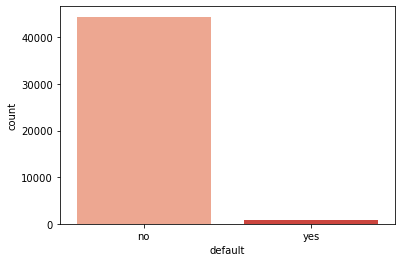

In [30]:
display(sns.countplot(data=bank_data, x="default", palette="Reds"))
display(bank_data["default"].value_counts(dropna=False))

<AxesSubplot:xlabel='housing', ylabel='count'>

yes    25130
no     20081
Name: housing, dtype: int64

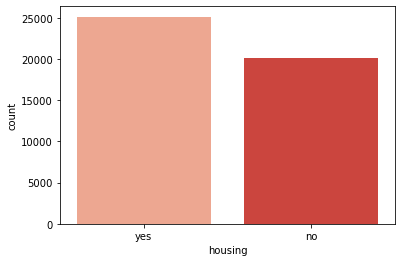

In [31]:
display(sns.countplot(data=bank_data, x="housing", palette="Reds"))
display(bank_data["housing"].value_counts(dropna=False))

<AxesSubplot:xlabel='loan', ylabel='count'>

no     37967
yes     7244
Name: loan, dtype: int64

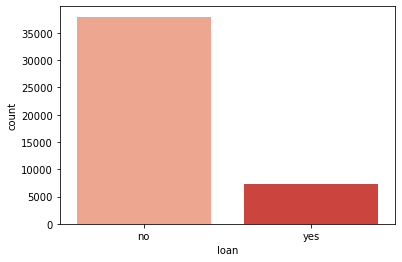

In [32]:
display(sns.countplot(data=bank_data, x="loan", palette="Reds"))
display(bank_data["loan"].value_counts(dropna=False))

<AxesSubplot:xlabel='contact', ylabel='count'>

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

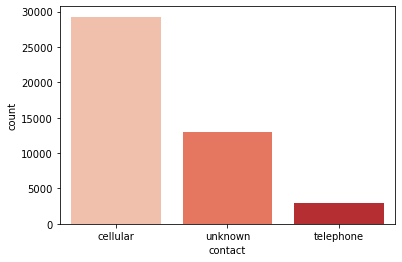

In [33]:
display(sns.countplot(data=bank_data, x="contact",  order=bank_data['contact'].value_counts().index, palette="Reds"))
display(bank_data["contact"].value_counts(dropna=False))

<AxesSubplot:xlabel='month', ylabel='count'>

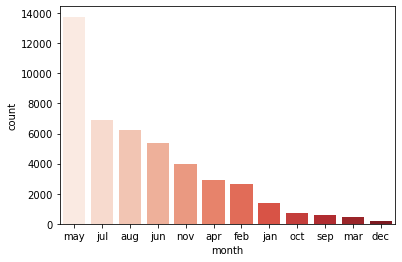

In [34]:
sns.countplot(data=bank_data, x="month",  order=bank_data['month'].value_counts().index, palette="Reds")

<AxesSubplot:xlabel='poutcome', ylabel='count'>

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

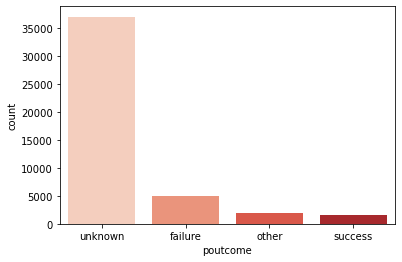

In [35]:
display(sns.countplot(data=bank_data, x="poutcome", palette="Reds"))

display(bank_data["poutcome"].value_counts(dropna=False))

<AxesSubplot:xlabel='default', ylabel='count'>

no     44396
yes      815
Name: default, dtype: int64

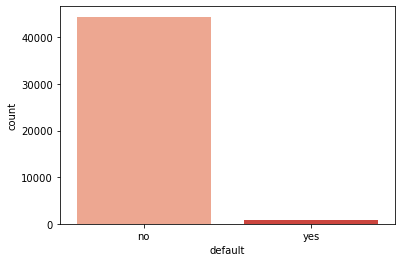

In [36]:
display(sns.countplot(data=bank_data, x="default", palette="Reds"))

display(bank_data["default"].value_counts(dropna=False))

<AxesSubplot:xlabel='y', ylabel='count'>

no     39922
yes     5289
Name: y, dtype: int64

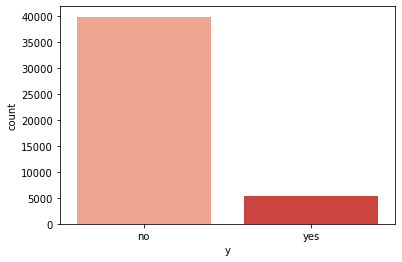

In [37]:
display(sns.countplot(data=bank_data, x="y", palette="Reds"))

display(bank_data["y"].value_counts(dropna=False))

##### 7C) Analyzing the target variable "y" more to get the proportion of each category

In [38]:
bank_data["y"].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

##### 
<i>The dataset is an imbalanced one. Out of all clients contacted, only 12% agreed to subscribe to the term deposit offer, whereas a majority of them (88%) did not subscribe to the term deposit offer.</i> 

##### 7D) Analyzing the variable "job" by target variable "y"

<AxesSubplot:xlabel='count', ylabel='job'>

y,no,yes,All
job,,,
admin.,4540,631,5171
blue-collar,9024,708,9732
entrepreneur,1364,123,1487
housemaid,1131,109,1240
management,8157,1301,9458
retired,1748,516,2264
self-employed,1392,187,1579
services,3785,369,4154
student,669,269,938


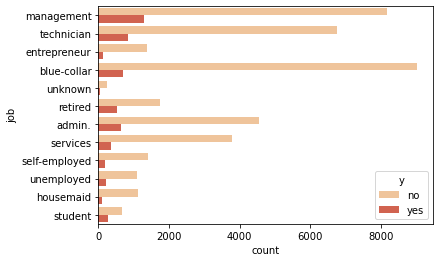

In [39]:
display(sns.countplot(data=bank_data, y="job", hue="y", palette="OrRd"))

display(pd.crosstab(bank_data["job"], bank_data["y"], margins=True))

##### 7E) Analyzing the variable "marital" by target variable "y"

<AxesSubplot:xlabel='marital', ylabel='count'>

y,no,yes,All
marital,,,
divorced,4585,622,5207
married,24459,2755,27214
single,10878,1912,12790
All,39922,5289,45211


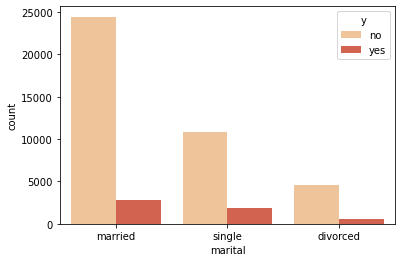

In [40]:
display(sns.countplot(data=bank_data, x="marital", hue="y", palette="OrRd"))

display(pd.crosstab(bank_data["marital"], bank_data["y"], margins=True))

##### 7F) Analyzing the variable "education" by target variable "y"

<AxesSubplot:xlabel='education', ylabel='count'>

y,no,yes,All
education,,,
primary,6260,591,6851
secondary,20752,2450,23202
tertiary,11305,1996,13301
unknown,1605,252,1857
All,39922,5289,45211


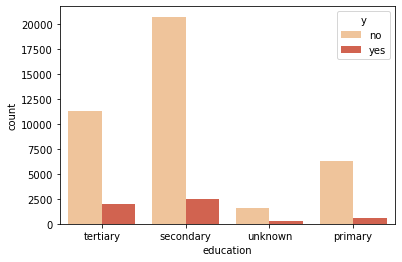

In [41]:
display(sns.countplot(data=bank_data, x="education", hue="y", palette="OrRd"))

display(pd.crosstab(bank_data["education"], bank_data["y"], margins=True))

##### 7G) Analyzing the variable "default" by target variable "y"

<AxesSubplot:xlabel='default', ylabel='count'>

y,no,yes,All
default,,,
no,39159,5237,44396
yes,763,52,815
All,39922,5289,45211


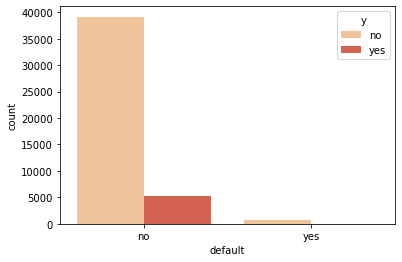

In [42]:
display(sns.countplot(data=bank_data, x="default", hue="y", palette="OrRd"))

display(pd.crosstab(bank_data["default"], bank_data["y"], margins=True))

##### 7H) Analyzing the variable "housing" by target variable "y"

<AxesSubplot:xlabel='housing', ylabel='count'>

y,no,yes,All
housing,,,
no,16727,3354,20081
yes,23195,1935,25130
All,39922,5289,45211


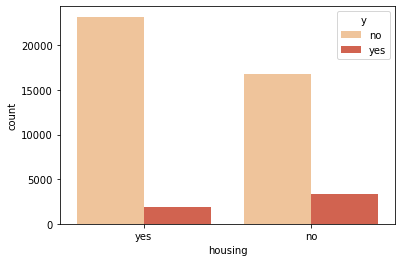

In [43]:
display(sns.countplot(data=bank_data, x="housing", hue="y", palette="OrRd"))

display(pd.crosstab(bank_data["housing"], bank_data["y"], margins=True))

##### 7I) Analyzing the variable "loan" by target variable "y"

y,no,yes,All
loan,,,
no,33162,4805,37967
yes,6760,484,7244
All,39922,5289,45211


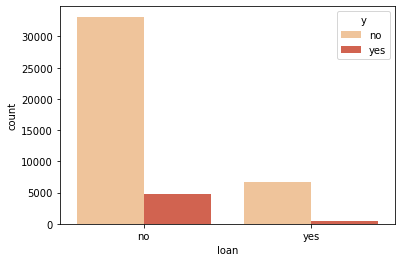

In [44]:
sns.countplot(data=bank_data, x="loan", hue="y", palette="OrRd")

display(pd.crosstab(bank_data["loan"], bank_data["y"], margins=True))

##### 7J) Analyzing the variable "contact" by target variable "y"

y,no,yes,All
contact,,,
cellular,24916,4369,29285
telephone,2516,390,2906
unknown,12490,530,13020
All,39922,5289,45211


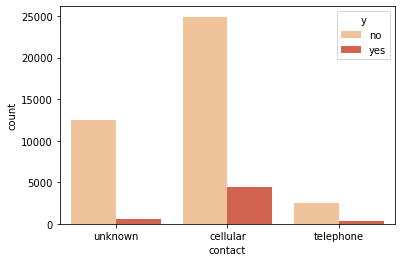

In [45]:
sns.countplot(data=bank_data, x="contact", hue="y", palette="OrRd", )

display(pd.crosstab(bank_data["contact"], bank_data["y"], margins=True))

##### 7K) Analyzing the variable "month" by target variable "y"

y,no,yes,All
month,,,
apr,2355,577,2932
aug,5559,688,6247
dec,114,100,214
feb,2208,441,2649
jan,1261,142,1403
jul,6268,627,6895
jun,4795,546,5341
mar,229,248,477
may,12841,925,13766


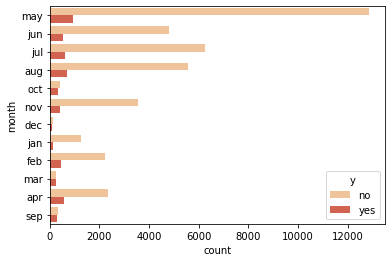

In [46]:
sns.countplot(data=bank_data, y="month", hue="y", palette="OrRd", )

display(pd.crosstab(bank_data["month"], bank_data["y"], margins=True))

##### 7L) Analyzing the variable "poutcome" by target variable "y"

y,no,yes,All
poutcome,,,
failure,4283,618,4901
other,1533,307,1840
success,533,978,1511
unknown,33573,3386,36959
All,39922,5289,45211


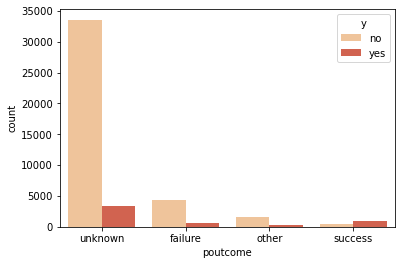

In [47]:
sns.countplot(data=bank_data, x="poutcome", hue="y", palette="OrRd", )

display(pd.crosstab(bank_data["poutcome"], bank_data["y"], margins=True))

### <b>DATA PREPROCESSING</b>

#### 1) Remove the features "day" & "month" because they aren't useful for predicting the outcome of future marketing campaigns

In [48]:
bank_data.drop(columns=["day", "month"], inplace=True)
bank_data.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no


#### 2) Remove the feature "duration" because it won't be useful for predicting the outcome of future marketing campaigns.

In [49]:
bank_data.drop(columns=["duration"], inplace=True)
bank_data.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,0,unknown,no


#### 2) Handle missing values

* In the EDA phase, I saw that none of the features have missing values.

* However, on closer inspection, I saw that three of the features, "education", "contact", "job", & "poutcome" have values called "unknown". 

* Assuming that "unknown" is a code for null values, I will treat "unknown" values as missing values.

##### 2A) Replace "unknown" with Null values in the feature "job"

In [50]:
bank_data["job"] = bank_data["job"].replace({"unknown":np.nan}) 

In [51]:
display(bank_data["job"].value_counts(dropna=False))
print("_______________________")
display(bank_data["job"].value_counts(dropna=False, normalize=True))

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288
Name: job, dtype: int64

_______________________


blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
NaN              0.006370
Name: job, dtype: float64

##### 2B) Replace "unknown" with Null values in the feature "education"

In [52]:
bank_data["education"] = bank_data["education"].replace({"unknown":np.nan}) 

In [53]:
display(bank_data["education"].value_counts(dropna=False))
print("_______________________")
display(bank_data["education"].value_counts(dropna=False, normalize=True))

secondary    23202
tertiary     13301
primary       6851
NaN           1857
Name: education, dtype: int64

_______________________


secondary    0.513194
tertiary     0.294198
primary      0.151534
NaN          0.041074
Name: education, dtype: float64

##### 2C) Replace "unknown" with Null values in the feature "poutcome"

In [54]:
bank_data["poutcome"] = bank_data["poutcome"].replace({"unknown":np.nan}) 

In [55]:
display(bank_data["poutcome"].value_counts(dropna=False))
print("_______________________")
display(bank_data["poutcome"].value_counts(dropna=False, normalize=True))

NaN        36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

_______________________


NaN        0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

#####  2D) Replace "unknown " with Null values in the feature "contact"

In [56]:
bank_data["contact"] = bank_data["contact"].replace({"unknown":np.nan}) 

In [57]:
display(bank_data["contact"].value_counts(dropna=False))
print("_______________________")
display(bank_data["contact"].value_counts(dropna=False, normalize=True))

cellular     29285
NaN          13020
telephone     2906
Name: contact, dtype: int64

_______________________


cellular     0.647741
NaN          0.287983
telephone    0.064276
Name: contact, dtype: float64

#####  2E) Impute the missing values in categorical features "job" & "education"

1. "job" = I replace the Null values with the most frequent category. I will get the most frequent category using "mode()" function.
2. "education" = I replace the Null values with the most frequent category. I will get the most frequent category using "mode()" function.

In [58]:
# Count the number of Null values in the feature "job"

bank_data["job"].isnull().sum()

288

In [59]:
# View the count of all unique categories, including Null values, in the feature "job"

bank_data["job"].value_counts(dropna=False)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288
Name: job, dtype: int64

In [60]:
# Replace the Null values in the feature "job" with the most frequent category

job_mode_value = bank_data["job"].mode()[0]
bank_data["job"].fillna(value=job_mode_value, inplace=True)
display(bank_data["job"].value_counts(dropna=False))

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

<AxesSubplot:xlabel='count', ylabel='job'>

Text(0.5, 1.0, 'Subscription by Job Type')

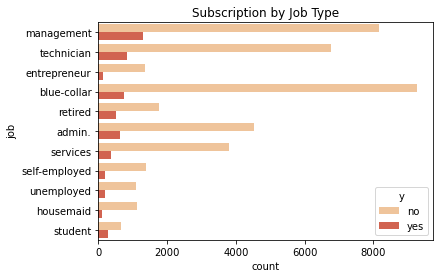

In [61]:
display(sns.countplot(data=bank_data, y="job", hue="y", palette="OrRd"))
plt.title("Subscription by Job Type")

In [62]:
# Count the number of Null values in the feature "education"

bank_data["education"].isnull().sum()

1857

In [63]:
# View the count of all unique categories, including Null values, in the feature "education"

bank_data["education"].value_counts(dropna=False)

secondary    23202
tertiary     13301
primary       6851
NaN           1857
Name: education, dtype: int64

In [64]:
# Replace the Null values in the feature "education" with the most frequent category

education_mode_value = bank_data["education"].mode()[0]
bank_data["education"].fillna(value=education_mode_value, inplace=True)
display(bank_data["education"].value_counts(dropna=False))

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

Text(0.5, 1.0, 'Subscription by Educational Status')

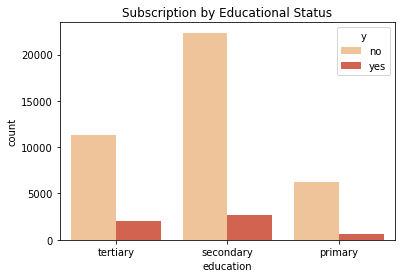

In [65]:
display(sns.countplot(data=bank_data, x="education", hue="y", palette="OrRd"))
plt.title("Subscription by Educational Status")

In [66]:
# Count the number of Null values in the feature "contact"

bank_data["contact"].isnull().sum()

13020

In [67]:
# View the count of all unique categories, including Null values, in the feature "contact"

bank_data["contact"].value_counts(dropna=False)

cellular     29285
NaN          13020
telephone     2906
Name: contact, dtype: int64

In [68]:
# Replace the Null values in the feature "contact" with the most frequent category

contact_mode_value = bank_data["contact"].mode()[0]
bank_data["contact"].fillna(value=contact_mode_value, inplace=True)
display(bank_data["contact"].value_counts(dropna=False))

cellular     42305
telephone     2906
Name: contact, dtype: int64

In [69]:
# Count the number of Null values in the feature "poutcome"

bank_data["poutcome"].isnull().sum()

36959

In [70]:
# View the count of all unique categories, including Null values, in the feature "poutcome"

bank_data["poutcome"].value_counts(dropna=False)

NaN        36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [71]:
# Replace the Null values in the feature "poutcome" with the most frequent category

poutcome_mode_value = bank_data["poutcome"].mode()[0]
bank_data["poutcome"].fillna(value=poutcome_mode_value, inplace=True)
display(bank_data["poutcome"].value_counts(dropna=False))

failure    41860
other       1840
success     1511
Name: poutcome, dtype: int64

#### 3) Explore the continuous features "pdays" & "previous" further

##### The UCI website from where I got the dataset states that the value 999 in "pdays" feature means client was not previously contacted.

##### However, when I analyzed the "pdays" variable, I found that there were no records where "pdays=999".

In [72]:
bank_data[bank_data.loc[:, "pdays"]==999]

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y


##### Exploring the values in "pdays" variable more, I found that ~81% of the records had a value "-1".

In [73]:
bank_data[bank_data.loc[:, "pdays"]==-1].head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,1,-1,0,failure,no
1,44,technician,single,secondary,no,29,yes,no,cellular,1,-1,0,failure,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,1,-1,0,failure,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,1,-1,0,failure,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,1,-1,0,failure,no


In [74]:
bank_data[bank_data.loc[:, "pdays"]==-1]["pdays"].value_counts()

-1    36954
Name: pdays, dtype: int64

In [75]:
bank_data["pdays"].value_counts(normalize=True)

-1      0.817367
 182    0.003694
 92     0.003251
 91     0.002787
 183    0.002787
          ...   
 449    0.000022
 452    0.000022
 648    0.000022
 595    0.000022
 530    0.000022
Name: pdays, Length: 559, dtype: float64

##### Checking further, I found that wherever "pdays=-1", the corresponding values in "previous" feature were 0. The feature "previous" displays number of contacts performed for the given client before this marketing campaign. Therefore, "previous=0" means that the given client was never contacted before this campaing.

In [76]:
len_previous_0 = len(bank_data[(bank_data.loc[:, "previous"]==0)]["previous"])
print(f"Number of records where 'previous=0': {len_previous_0}")

Number of records where 'previous=0': 36954


In [77]:
len_previous0_pdays_neg1 = len(bank_data[(bank_data.loc[:, "pdays"]==-1) & (bank_data.loc[:, "previous"]==0)][["pdays","previous"]])

print(f"Number of records where 'previous=0' & 'pdays=-1': {len_previous0_pdays_neg1}")

Number of records where 'previous=0' & 'pdays=-1': 36954


##### Equipped with this piece of information, I updated all records to replace -1 with 0 in the feature "pdays". In this case, "pdays=0" means that the customer was never contacted before this campaign.

In [78]:
bank_data["pdays"] = bank_data["pdays"].replace({-1:0})

In [79]:
bank_data["pdays"].value_counts()

0      36954
182      167
92       147
91       126
183      126
       ...  
449        1
452        1
648        1
595        1
530        1
Name: pdays, Length: 559, dtype: int64

#### 4) Scale the continuous features using StandardScaler()

In [80]:
continuous_features = list(bank_data.select_dtypes(include='int64').columns)
continuous_features

['age', 'balance', 'campaign', 'pdays', 'previous']

In [81]:
scaler = StandardScaler()
scaler_fit = scaler.fit(bank_data[continuous_features])
continuous_features_scaled = scaler_fit.transform(bank_data[continuous_features])
display(continuous_features_scaled)
continuous_features_scaled_df = pd.DataFrame(data=continuous_features_scaled, columns=continuous_features)
display(continuous_features_scaled_df)

array([[ 1.60696496,  0.25641925, -0.56935064, -0.41100886, -0.25194037],
       [ 0.28852927, -0.43789469, -0.56935064, -0.41100886, -0.25194037],
       [-0.74738448, -0.44676247, -0.56935064, -0.41100886, -0.25194037],
       ...,
       [ 2.92540065,  1.42959305,  0.72181052,  1.43283534,  1.05047333],
       [ 1.51279098, -0.22802402,  0.39902023, -0.41100886, -0.25194037],
       [-0.37068857,  0.52836436, -0.24656035,  1.47291891,  4.52357654]])

,age,balance,campaign,pdays,previous
0,1.606965,0.256419,-0.569351,-0.411009,-0.251940
1,0.288529,-0.437895,-0.569351,-0.411009,-0.251940
2,-0.747384,-0.446762,-0.569351,-0.411009,-0.251940
3,0.571051,0.047205,-0.569351,-0.411009,-0.251940
4,-0.747384,-0.447091,-0.569351,-0.411009,-0.251940
...,...,...,...,...,...
45206,0.947747,-0.176460,0.076230,-0.411009,-0.251940
45207,2.831227,0.120447,-0.246560,-0.411009,-0.251940
45208,2.925401,1.429593,0.721811,1.432835,1.050473
45209,1.512791,-0.228024,0.399020,-0.411009,-0.251940


#### 5) Encode the categorical features & the categorical target

In [82]:
categorical_features_df = bank_data.drop(columns=continuous_features)
categorical_features_df.head()

,job,marital,education,default,housing,loan,contact,poutcome,y
0,management,married,tertiary,no,yes,no,cellular,failure,no
1,technician,single,secondary,no,yes,no,cellular,failure,no
2,entrepreneur,married,secondary,no,yes,yes,cellular,failure,no
3,blue-collar,married,secondary,no,yes,no,cellular,failure,no
4,blue-collar,single,secondary,no,no,no,cellular,failure,no


#####  5A) Use LabelEncoder() to encode the categorical target "y"

In [83]:
label_encoder = LabelEncoder()

In [84]:
categorical_features_df["y"]=label_encoder.fit_transform(np.array(categorical_features_df["y"]).reshape(-1,1)) 

C:\Users\aanch\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
categorical_features_df["y"].value_counts(dropna=False)

0    39922
1     5289
Name: y, dtype: int64

In [86]:
encoded_target = categorical_features_df["y"]
encoded_target

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

#####  5B) Update the categories in the feature "job"

The feature "job" has 12 distinct categories - 


1. Management
2. Technician
3. Entrepreneur
4. Blue-collar
5. Unknown
6. Retired
7. Admin.
8. Services
9. Self-employed
10. Unemployed
11. Housemaid
12. Student
        
    
Applying one-hot encoding would result in 12 new features. For the sake of brevity, I will transform these 12 categories into 2 categories - 
    
* The first new category "working" will include "Management, Technician, Entrepreneur, Blue-collar, Admin., Services, Self-employed, & Housemaid".
* The second new category "not_working" will include "Retired, Unemployed, & Student". 

In [87]:
categorical_features_df["job"].replace({"blue-collar": "job_blue-collar",
                                        "management": "job_management",
                                        "technician": "job_technician",
                                        "admin.": "job_admin",
                                        "services": "job_services",
                                        "self-employed": "job_self-employed",
                                        "entrepreneur": "job_entrepreneur", 
                                        "housemaid": "job_housemaid",
                                        "retired": "job_retired",
                                        "unemployed": "job_unemployed",
                                        "student": "job_student"}, 
                         inplace=True)

display(categorical_features_df["job"].value_counts(dropna=False))

job_blue-collar      10020
job_management        9458
job_technician        7597
job_admin             5171
job_services          4154
job_retired           2264
job_self-employed     1579
job_entrepreneur      1487
job_unemployed        1303
job_housemaid         1240
job_student            938
Name: job, dtype: int64

#####  5C) Update the categories in the feature "default"

The feature "default" has 2 distinct categories - 

1. Yes
2. No     
    
I will convert "yes" to "default_yes" & "no" to "default_no". This will help in differentiating the feature names during OneHotEncoding.

In [88]:
categorical_features_df["default"].replace({"yes":"default_yes", "no":"default_no"}, 
                         inplace=True)

display(categorical_features_df["default"].value_counts(dropna=False))

default_no     44396
default_yes      815
Name: default, dtype: int64

#####  5D) Update the categories in the feature "housing"

The feature "default" has 2 distinct categories - 

1. Yes
2. No     
    
I will convert "yes" to "housing_yes" & "no" to "housing_no". This will help in differentiating the feature names during OneHotEncoding.

In [89]:
categorical_features_df["housing"].replace({"yes":"housing_yes", "no":"housing_no"}, 
                         inplace=True)

display(categorical_features_df["housing"].value_counts(dropna=False))

housing_yes    25130
housing_no     20081
Name: housing, dtype: int64

#####  5E) Update the categories in the feature "housing"

The feature "loan" has 2 distinct categories - 

1. Yes
2. No     
    
I will convert "yes" to "loan_yes" & "no" to "loan_no". This will help in differentiating the feature names during OneHotEncoding.

In [90]:
categorical_features_df["loan"].replace({"yes":"loan_yes", "no":"loan_no"}, 
                         inplace=True)

display(categorical_features_df["loan"].value_counts(dropna=False))

loan_no     37967
loan_yes     7244
Name: loan, dtype: int64

#####  5F) Update the categories in the feature "marital"

In [91]:
categorical_features_df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [92]:
categorical_features_df["marital"].replace({"married":"marital_married",
                                            "single":"marital_single",
                                            "divorced":"marital_divorced"}, 
                         inplace=True)

display(categorical_features_df["marital"].value_counts(dropna=False))

marital_married     27214
marital_single      12790
marital_divorced     5207
Name: marital, dtype: int64

#####  5G) Update the categories in the feature "education"

In [93]:
categorical_features_df["education"].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

In [94]:
categorical_features_df["education"].replace({"secondary":"education_secondary",
                                            "tertiary":"education_tertiary",
                                            "primary":"education_primary"}, 
                         inplace=True)

display(categorical_features_df["education"].value_counts(dropna=False))

education_secondary    25059
education_tertiary     13301
education_primary       6851
Name: education, dtype: int64

#####  5H) Update the categories in the feature "contact"

In [95]:
categorical_features_df["contact"].value_counts()

cellular     42305
telephone     2906
Name: contact, dtype: int64

In [96]:
categorical_features_df["contact"].replace({"cellular":"contact_cellular",
                                            "telephone":"contact_telephone"}, 
                         inplace=True)

display(categorical_features_df["contact"].value_counts(dropna=False))

contact_cellular     42305
contact_telephone     2906
Name: contact, dtype: int64

#####  5I) Update the categories in the feature "poutcome"

In [97]:
categorical_features_df["poutcome"].value_counts()

failure    41860
other       1840
success     1511
Name: poutcome, dtype: int64

In [98]:
categorical_features_df["poutcome"].replace({"failure":"poutcome_failure",
                                            "other":"poutcome_other",
                                            "success":"poutcome_success"}, 
                         inplace=True)

display(categorical_features_df["poutcome"].value_counts(dropna=False))

poutcome_failure    41860
poutcome_other       1840
poutcome_success     1511
Name: poutcome, dtype: int64

In [99]:
display(categorical_features_df)

,job,marital,education,default,housing,loan,contact,poutcome,y
0,job_management,marital_married,education_tertiary,default_no,housing_yes,loan_no,contact_cellular,poutcome_failure,0
1,job_technician,marital_single,education_secondary,default_no,housing_yes,loan_no,contact_cellular,poutcome_failure,0
2,job_entrepreneur,marital_married,education_secondary,default_no,housing_yes,loan_yes,contact_cellular,poutcome_failure,0
3,job_blue-collar,marital_married,education_secondary,default_no,housing_yes,loan_no,contact_cellular,poutcome_failure,0
4,job_blue-collar,marital_single,education_secondary,default_no,housing_no,loan_no,contact_cellular,poutcome_failure,0
...,...,...,...,...,...,...,...,...,...
45206,job_technician,marital_married,education_tertiary,default_no,housing_no,loan_no,contact_cellular,poutcome_failure,1
45207,job_retired,marital_divorced,education_primary,default_no,housing_no,loan_no,contact_cellular,poutcome_failure,1
45208,job_retired,marital_married,education_secondary,default_no,housing_no,loan_no,contact_cellular,poutcome_success,1
45209,job_blue-collar,marital_married,education_secondary,default_no,housing_no,loan_no,contact_telephone,poutcome_failure,0


#####  5J) Use OneHotEncoder() to encode the categorical features

In [100]:
categorical_features = list(categorical_features_df.select_dtypes(include='object').columns)
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome']

In [101]:
categorical_features_df[categorical_features]

,job,marital,education,default,housing,loan,contact,poutcome
0,job_management,marital_married,education_tertiary,default_no,housing_yes,loan_no,contact_cellular,poutcome_failure
1,job_technician,marital_single,education_secondary,default_no,housing_yes,loan_no,contact_cellular,poutcome_failure
2,job_entrepreneur,marital_married,education_secondary,default_no,housing_yes,loan_yes,contact_cellular,poutcome_failure
3,job_blue-collar,marital_married,education_secondary,default_no,housing_yes,loan_no,contact_cellular,poutcome_failure
4,job_blue-collar,marital_single,education_secondary,default_no,housing_no,loan_no,contact_cellular,poutcome_failure
...,...,...,...,...,...,...,...,...
45206,job_technician,marital_married,education_tertiary,default_no,housing_no,loan_no,contact_cellular,poutcome_failure
45207,job_retired,marital_divorced,education_primary,default_no,housing_no,loan_no,contact_cellular,poutcome_failure
45208,job_retired,marital_married,education_secondary,default_no,housing_no,loan_no,contact_cellular,poutcome_success
45209,job_blue-collar,marital_married,education_secondary,default_no,housing_no,loan_no,contact_telephone,poutcome_failure


In [102]:
ohe = OneHotEncoder()

In [103]:
catergorical_features_encoded = ohe.fit_transform(categorical_features_df[categorical_features]).toarray()
display(catergorical_features_encoded)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [104]:
ohe_encoded_categories = list(ohe.categories_)

ohe_encoded_categories_list = []
for each_category in ohe_encoded_categories:
    for i in each_category:
        ohe_encoded_categories_list.append(i)

In [105]:
ohe_encoded_categories_list

['job_admin',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success']

In [106]:
categorical_features_encoded_df = pd.DataFrame(data=catergorical_features_encoded, columns=ohe_encoded_categories_list)
display(categorical_features_encoded_df)

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
45207,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
45208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
45209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


#### 6) Combine the "continuous_features_scaled_df", "categorical_features_encoded_df", & "encoded_target" dataframes/series using pandas.concat()

In [107]:
continuous_features_scaled_df

,age,balance,campaign,pdays,previous
0,1.606965,0.256419,-0.569351,-0.411009,-0.251940
1,0.288529,-0.437895,-0.569351,-0.411009,-0.251940
2,-0.747384,-0.446762,-0.569351,-0.411009,-0.251940
3,0.571051,0.047205,-0.569351,-0.411009,-0.251940
4,-0.747384,-0.447091,-0.569351,-0.411009,-0.251940
...,...,...,...,...,...
45206,0.947747,-0.176460,0.076230,-0.411009,-0.251940
45207,2.831227,0.120447,-0.246560,-0.411009,-0.251940
45208,2.925401,1.429593,0.721811,1.432835,1.050473
45209,1.512791,-0.228024,0.399020,-0.411009,-0.251940


In [108]:
categorical_features_encoded_df

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
45207,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
45208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
45209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [109]:
encoded_target

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [110]:
preprocessed_bank_data = pd.concat([continuous_features_scaled_df, categorical_features_encoded_df, encoded_target], axis=1)

In [111]:
preprocessed_bank_data

,age,balance,campaign,pdays,previous,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,y
0,1.606965,0.256419,-0.569351,-0.411009,-0.251940,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,0.288529,-0.437895,-0.569351,-0.411009,-0.251940,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,-0.747384,-0.446762,-0.569351,-0.411009,-0.251940,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0
3,0.571051,0.047205,-0.569351,-0.411009,-0.251940,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,-0.747384,-0.447091,-0.569351,-0.411009,-0.251940,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.076230,-0.411009,-0.251940,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
45207,2.831227,0.120447,-0.246560,-0.411009,-0.251940,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
45208,2.925401,1.429593,0.721811,1.432835,1.050473,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
45209,1.512791,-0.228024,0.399020,-0.411009,-0.251940,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0


#### 7) Answer Research Questions

##### 7A) Proportion of successful calls

In [112]:
total_calls = len(preprocessed_bank_data[["contact_telephone"]])
successful_calls = preprocessed_bank_data[((preprocessed_bank_data.loc[:, "contact_telephone"] == 1) | (preprocessed_bank_data.loc[:, "contact_cellular"] == 1 )) & (preprocessed_bank_data.loc[:, "y"] == 1)].shape[0]

proportion_successful_calls = successful_calls/total_calls

proportion_successful_cellular_calls = (preprocessed_bank_data[((preprocessed_bank_data.loc[:, "contact_telephone"] == 1) | (preprocessed_bank_data.loc[:, "contact_cellular"] == 1 )) & (preprocessed_bank_data.loc[:, "y"] == 1)]["contact_cellular"].sum()) / successful_calls
proportion_successful_telephone_calls = (preprocessed_bank_data[((preprocessed_bank_data.loc[:, "contact_telephone"] == 1) | (preprocessed_bank_data.loc[:, "contact_cellular"] == 1 )) & (preprocessed_bank_data.loc[:, "y"] == 1)]["contact_telephone"].sum()) / successful_calls


print(f"The proportion of successful calls: {round(proportion_successful_calls * 100,2)}")
print(f"The proportion of successful calls made through cell phone: {round(proportion_successful_cellular_calls * 100,2)}")
print(f"The proportion of successful calls made through telephone: {round(proportion_successful_telephone_calls * 100,2)}")

The proportion of successful calls: 11.7
The proportion of successful calls made through cell phone: 92.63
The proportion of successful calls made through telephone: 7.37


#### 8) Handling imbalanced dataset

In [113]:
preprocessed_bank_data["y"].value_counts(normalize=True)

0    0.883015
1    0.116985
Name: y, dtype: float64

In [114]:
over_sampler = RandomOverSampler()

In [115]:
preprocessed_bank_data_features = preprocessed_bank_data.drop(columns=["y"])
preprocessed_bank_data_target = preprocessed_bank_data["y"]

In [116]:
sampled_bank_data_features, sampled_bank_data_target = over_sampler.fit_sample(preprocessed_bank_data_features,preprocessed_bank_data_target) 

In [117]:
display(sampled_bank_data_target.value_counts(normalize=True))

0    0.5
1    0.5
Name: y, dtype: float64

In [118]:
sampled_bank_data = pd.concat([sampled_bank_data_features, sampled_bank_data_target], axis=1)

In [119]:
sampled_bank_data

,age,balance,campaign,pdays,previous,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,y
0,1.606965,0.256419,-0.569351,-0.411009,-0.25194,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,0.288529,-0.437895,-0.569351,-0.411009,-0.25194,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,-0.747384,-0.446762,-0.569351,-0.411009,-0.25194,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0
3,0.571051,0.047205,-0.569351,-0.411009,-0.25194,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,-0.747384,-0.447091,-0.569351,-0.411009,-0.25194,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,-0.653211,-0.361369,-0.569351,-0.411009,-0.25194,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
79840,-0.747384,-0.425743,-0.246560,-0.411009,-0.25194,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
79841,0.947747,0.240326,1.044601,-0.411009,-0.25194,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
79842,2.737053,1.699896,-0.569351,-0.411009,-0.25194,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1


#### 9) Feature Selection

#####  9A) Feature Selection - Continuous Features

I will use Kendall's correlation coefficient to remove the features that are highly correlated with one another.

<AxesSubplot:>

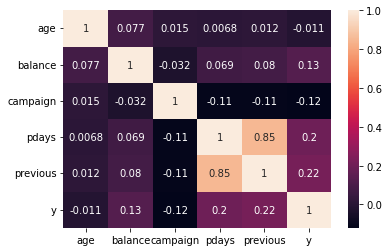

In [120]:
continuous_features = sampled_bank_data[["age","balance","campaign","pdays","previous"]]
target = sampled_bank_data["y"]
sns.heatmap(pd.concat([continuous_features, target],axis=1).corr(method="kendall"),annot=True)

##### <i>The continuous features "pdays" & "" have a very high correlation (0.85) among themselves. This introduces the problem of multicollinearity in the model. Therefore, I will remove the feature "pdays" & will keep only the feature "previous".</i>

In [121]:
selected_continuous_features = continuous_features.drop(columns=["pdays"])
selected_continuous_features.head()

,age,balance,campaign,previous
0,1.606965,0.256419,-0.569351,-0.25194
1,0.288529,-0.437895,-0.569351,-0.25194
2,-0.747384,-0.446762,-0.569351,-0.25194
3,0.571051,0.047205,-0.569351,-0.25194
4,-0.747384,-0.447091,-0.569351,-0.25194


#####  9B) Feature Selection - Categorical Features

I will use Chi-Squared test to remove the umimportant categorical features.

In [122]:
categorical_features = sampled_bank_data[ohe_encoded_categories_list]
display(categorical_features.head())
display(target.head())

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [123]:
f_p_values = chi2(categorical_features,target)

In [124]:
p_values = pd.Series(f_p_values[1])
p_values.index = categorical_features.columns
round(p_values.sort_values(),6)

poutcome_success       0.000000
housing_yes            0.000000
housing_no             0.000000
loan_yes               0.000000
job_blue-collar        0.000000
poutcome_failure       0.000000
job_retired            0.000000
job_student            0.000000
education_tertiary     0.000000
marital_single         0.000000
education_primary      0.000000
marital_married        0.000000
job_management         0.000000
poutcome_other         0.000000
loan_no                0.000000
job_services           0.000000
job_entrepreneur       0.000000
default_yes            0.000000
education_secondary    0.000000
job_unemployed         0.000000
job_housemaid          0.000000
contact_telephone      0.000000
job_technician         0.000404
marital_divorced       0.059836
job_admin              0.059995
contact_cellular       0.128136
default_no             0.210779
job_self-employed      0.368983
dtype: float64

In [125]:
significant_categorical_features = p_values[p_values < 0.05]
round(significant_categorical_features.sort_values(),6)

poutcome_success       0.000000
housing_yes            0.000000
housing_no             0.000000
loan_yes               0.000000
job_blue-collar        0.000000
poutcome_failure       0.000000
job_retired            0.000000
job_student            0.000000
education_tertiary     0.000000
marital_single         0.000000
education_primary      0.000000
marital_married        0.000000
job_management         0.000000
poutcome_other         0.000000
loan_no                0.000000
job_services           0.000000
job_entrepreneur       0.000000
default_yes            0.000000
education_secondary    0.000000
job_unemployed         0.000000
job_housemaid          0.000000
contact_telephone      0.000000
job_technician         0.000404
dtype: float64

In [126]:
selected_categorical_features = sampled_bank_data[significant_categorical_features.index]

##### 9C) Combine final dataset

In [127]:
final_bank_data = pd.concat([selected_continuous_features,selected_categorical_features,target], axis=1)
final_bank_data

,age,balance,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_services,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,y
0,1.606965,0.256419,-0.569351,-0.25194,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,0.288529,-0.437895,-0.569351,-0.25194,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.747384,-0.446762,-0.569351,-0.25194,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
3,0.571051,0.047205,-0.569351,-0.25194,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,-0.747384,-0.447091,-0.569351,-0.25194,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,-0.653211,-0.361369,-0.569351,-0.25194,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
79840,-0.747384,-0.425743,-0.246560,-0.25194,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
79841,0.947747,0.240326,1.044601,-0.25194,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
79842,2.737053,1.699896,-0.569351,-0.25194,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


#### 10) Split the dataset into Train and Test data

In [128]:
features = final_bank_data.drop(columns=["y"])
target = final_bank_data["y"]

In [129]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [130]:
display(features_train.head())
display(target_train.head())

,age,balance,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_services,...,education_tertiary,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
30404,0.571051,-0.136390,-0.246560,-0.251940,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
41625,3.678792,0.522781,-0.569351,-0.251940,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
16230,-1.500776,0.284336,-0.569351,-0.251940,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
63269,-0.747384,0.196972,-0.569351,0.182198,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
74330,-0.182341,-0.285172,-0.246560,1.050473,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


30404    0
41625    0
16230    1
63269    1
74330    1
Name: y, dtype: int32

#### 11) Train Naive Bayes Model

Th Naive Bayes algorithm is a probabilitis classifier that can be used to find the probability that a particular record belongs to a specific class. Naive Bayes uses the Bayes Theorem for calculating the probabilities, however with a caveat that it assumes, naively, that all the independent variables are completely independent of another. Which, for the given Bank Marketing Dataset, is untrue.

In [131]:
nb_model = GaussianNB()
nb_model.fit(features_train, target_train)
target_predict_nb = nb_model.predict(features_test)
prob_nb = nb_model.predict_proba(features_test)

# Print the Classification Report
print(classification_report(target_test, target_predict_nb))

              precision    recall  f1-score   support

           0       0.60      0.82      0.69     11973
           1       0.72      0.46      0.56     11981

    accuracy                           0.64     23954
   macro avg       0.66      0.64      0.63     23954
weighted avg       0.66      0.64      0.63     23954



#### 10) Train Logistic Regression Model

In [132]:
logit_model = LogisticRegression()
logit_model.fit(features_train, target_train)
target_predict_logit = logit_model.predict(features_test)
prob_logit = logit_model.predict_proba(features_test)

# Print the Classification Report
print(classification_report(target_test, target_predict_logit))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68     11973
           1       0.69      0.60      0.64     11981

    accuracy                           0.66     23954
   macro avg       0.67      0.66      0.66     23954
weighted avg       0.67      0.66      0.66     23954



#### 12) Train K-Nearest Neighbors Model

In [133]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(features_train, target_train)
target_predict_knn = knn_model.predict(features_test)
prob_knn = knn_model.predict_proba(features_test)

# Print the Classification Report
print(classification_report(target_test, target_predict_knn))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     11973
           1       0.81      0.95      0.87     11981

    accuracy                           0.86     23954
   macro avg       0.87      0.86      0.86     23954
weighted avg       0.87      0.86      0.86     23954



#### 13) Train Random Forests

In [134]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=30)
rf_model.fit(features_train, target_train)
target_predict_rf = rf_model.predict(features_test)
prob_rf = rf_model.predict_proba(features_test)

# Print the Classification Report
print(classification_report(target_test, target_predict_rf))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     11973
           1       0.92      0.99      0.96     11981

    accuracy                           0.96     23954
   macro avg       0.96      0.96      0.96     23954
weighted avg       0.96      0.96      0.96     23954



#### 14) Train XGBoost

In [135]:
xgb_model = xgb.XGBClassifier(learning_rate=0.1,
                             max_depth=5,
                             n_estimators=300,
                             subsample=0.5,
                             colsample_bytree=0.5,
                             verbosity=1)
xgb_model.fit(features_train, target_train)
target_predict_xgb = xgb_model.predict(features_test)
prob_xgb = xgb_model.predict_proba(features_test)

# Print the Classification Report
print(classification_report(target_test, target_predict_xgb))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     11973
           1       0.77      0.65      0.70     11981

    accuracy                           0.73     23954
   macro avg       0.73      0.73      0.73     23954
weighted avg       0.73      0.73      0.73     23954



#### 15) Plot the ROC Curve

In [136]:
# Naive Bayes
nb_fpr, nb_tpr, threshold = roc_curve(target_test, target_predict_nb)
nb_auc = auc(nb_fpr, nb_tpr)

# Logistic Regression
logit_fpr, logit_tpr, threshold = roc_curve(target_test, target_predict_logit)
logit_auc = auc(logit_fpr, logit_tpr)

# K-Nearest Neighbors
knn_fpr, knn_tpr, threshold = roc_curve(target_test, target_predict_knn)
knn_auc = auc(knn_fpr, knn_tpr)

# Random Forests
rf_fpr, rf_tpr, threshold = roc_curve(target_test, target_predict_rf)
rf_auc = auc(rf_fpr, rf_tpr)

# XGBoost
xgb_fpr, xgb_tpr, threshold = roc_curve(target_test, target_predict_xgb)
xgb_auc = auc(xgb_fpr, xgb_tpr)

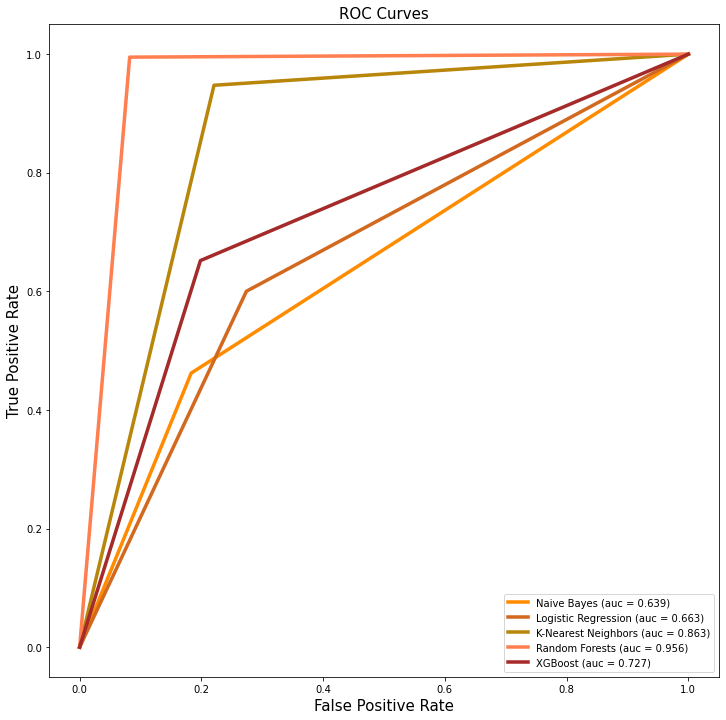

In [137]:
plt.figure(figsize=(12,12))

plt.plot(nb_fpr, nb_tpr, label="Naive Bayes (auc = %0.3f)" % nb_auc, color="darkorange", linewidth=3.5)
plt.plot(logit_fpr, logit_tpr, label="Logistic Regression (auc = %0.3f)" % logit_auc, color="chocolate", linewidth=3.5)
plt.plot(knn_fpr, knn_tpr, label="K-Nearest Neighbors (auc = %0.3f)" % knn_auc, color="darkgoldenrod", linewidth=3.5)
plt.plot(rf_fpr, rf_tpr, label="Random Forests (auc = %0.3f)" % rf_auc, color="coral", linewidth=3.5)
plt.plot(xgb_fpr, xgb_tpr, label="XGBoost (auc = %0.3f)" % xgb_auc, color="brown", linewidth=3.5)

plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title("ROC Curves", fontsize=15)
plt.legend()